## Exploratory Data Analysis on the Titanic Dataset
#### This is my first kernal and the objective of this kernal is to conduct exploratory data analysis (EDA) and statistical modeling on the Titanic Dataset in order to gather insights and evenutally predicting survior(0 = Not Survived, 1 = Survived). Out of the 891 passengers that went on board the titanic, approximately 38% of them got surived where as majority 62% did not survive the disaster.

#### I have outlined below the process i followed in conducting the aforementioned procedure

#### * Import the relevant python libraies for the analysis
#### * Load the train and test dataset and set the index if applicable
#### * Visually inspect the head of the dataset,Examine the train dataset to understand in particular if the data is tidy, shape of the dataset,examine datatypes, examine missing values, unique counts and build a data dictictionary dataframe
#### * Run discriptive statistics of object and numerical datatypes, and finally transform datatypes accordingly
#### * Carry-out univariate,bivariate and multivariate analysis using graphical and non graphical(some numbers represting the data) mediums
#### * Feature Engineering : Extract title from name, Extract new features from name, age, fare, sibsp, parch and cabin
#### * Preprocessing and Prepare data for statistical modeling
#### * Statistical Modelling


## 1. Import the relevant python libraries for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

## 2. Load the train and test dataset and set the index if applicable

In [2]:
#load the train dataset
train = pd.read_csv('train.csv')

In [3]:
#inspect the first few rows of the train dataset
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# set the index to passengerId
train = train.set_index('PassengerId')

In [5]:
#load the test dataset
test = pd.read_csv('test.csv')

In [6]:
#inspect the first few rows of the test dataset
display(test.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Visually inspect the head of the dataset,Examine the train dataset to understand in particular if the data is tidy, shape of the dataset,examine datatypes, examine missing values, unique counts and build a data dictionary dataframe

## Conditions to check if **data is tidy**

#### * Is every column a variable?
#### * Is every row an observation?
#### * Is every table a single observational unit?

In [7]:
#by calling the shape attribute of the train dataset we can observe that there are 891 observations and 11 columns
#in the data set
train.shape

(891, 11)

In [8]:
# Check out the data summary
# Age, Cabin and Embarked has missing data
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# identify datatypes of the 11 columns, add the stats to the datadict
datadict = pd.DataFrame(train.dtypes)
datadict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [10]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0
Cabin,object,687


In [11]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=train.nunique()
datadict

,0,MissingVal,NUnique
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248
Cabin,object,687,147


In [12]:
# Identify the count for each variable, add the stats to datadict
datadict['Count']=train.count()
datadict

,0,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


In [13]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


## 4. Run discriptive statistics of object and numerical datatypes, and finally transform datatypes accoringly

In [14]:
# get discripte statistcs on "object" datatypes
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lewy, Mr. Ervin G",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [15]:
# get discriptive statistcs on "number" datatypes
train.describe(include=['number'])

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 5. Carryout univariate and multivariate analysis using graphical and non graphical(some numbers represting the data)

In [16]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

###### only 38% of the passengers were survived, where as a majority 61% the passenger did not survive the disaster

### Univariate Analysis

c:\users\admin\appdata\local\programs\python\python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python39-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

<AxesSubplot:xlabel='Age', ylabel='Density'>

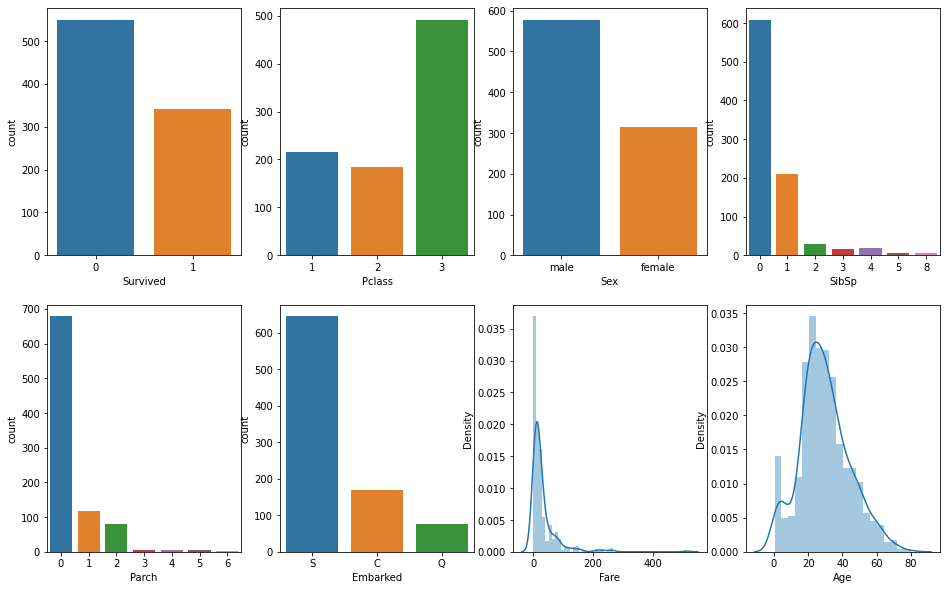

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot('Survived',data=train,ax=axes[0,0])
sns.countplot('Pclass',data=train,ax=axes[0,1])
sns.countplot('Sex',data=train,ax=axes[0,2])
sns.countplot('SibSp',data=train,ax=axes[0,3])
sns.countplot('Parch',data=train,ax=axes[1,0])
sns.countplot('Embarked',data=train,ax=axes[1,1])
sns.distplot(train['Fare'], kde=True,ax=axes[1,2])
sns.distplot(train['Age'].dropna(),kde=True,ax=axes[1,3])

### Bivariate EDA
##### * We can clearly see that male survial rates is around 20% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.
##### * There is also a clear relationship between Pclass and the survival by referring to first plot below. Passengers on Pclass1 had a better survial rate of approx 60% whereas passengers on pclass3 had the worst survial rate of approx 22%
##### * There is also a marginal relationship between the fare and survial rate.
##### * I have quantified the above relationships further in the last statsical modelling section

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

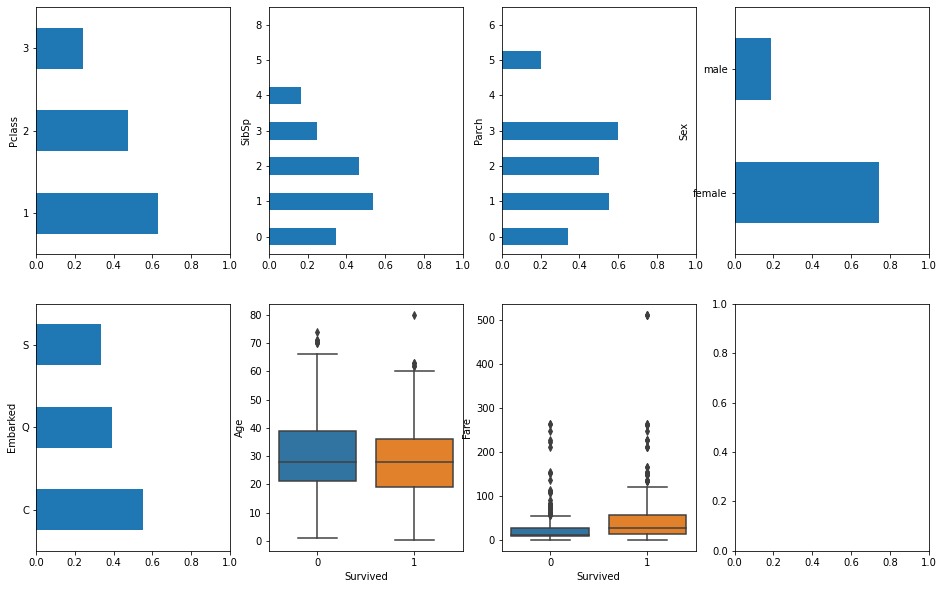

In [18]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2])

### Joint Plots(continous vs continous)

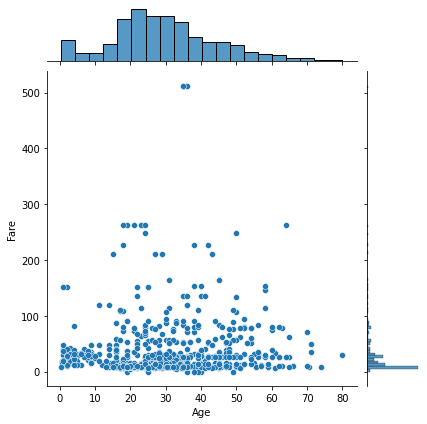

In [19]:
sns.jointplot(x="Age", y="Fare", data=train);

### Multivariate EDA
##### * Construct a Coorelation matrix of the int64 and float64 feature types
##### * There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived
##### * There is a negative coorelation between Fare and Pclass, Age and Plcass

<ipython-input-20-8d8f984d09d4>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

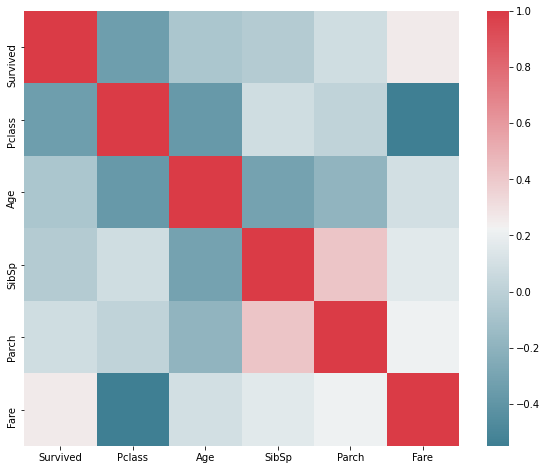

In [20]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## 6. Feature Engineering Data- Extract title from name, Extract new features from the other features

##### New Features

In [21]:
train['Name_len']=train.Name.str.len()

In [22]:
train['Ticket_First']=train.Ticket.str[0]

In [23]:
train['FamilyCount']=train.SibSp+train.Parch

In [24]:
train['Cabin_First']=train.Cabin.str[0]

In [25]:
# Regular expression to get the title of the Name
train['title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)

In [26]:
train.title.value_counts().reset_index()

,index,title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Col.,2
8,Mlle.,2
9,Mme.,1


## 7. Preprocessing and Prepare data for statistical modeling

##### a. Imput Missing or Zero values to the Fare variable

In [27]:
# we see that there are 15 Zero values and its reasonbale 
# to flag them as missing values since every ticket 
# should have a value greater than 0
print((train.Fare == 0).sum())

15


In [28]:
# mark zero values as missing or NaN
train.Fare = train.Fare.replace(0, np.NaN)

In [29]:
# validate to see if there are no more zero values
print((train.Fare == 0).sum())

0


In [30]:
# keep the index
train[train.Fare.isnull()].index

Int64Index([180, 264, 272, 278, 303, 414, 467, 482, 598, 634, 675, 733, 807,
            816, 823],
           dtype='int64', name='PassengerId')

In [31]:
train.Fare.mean()

32.75564988584475

### Having missing values in a dataset can cause errors with some machine learning algorithms and either the rows that has missing values should be removed or imputed 
#### Imputing refers to using a model to replace missing values.

### There are many options we could consider when replacing a missing value, for example:

##### * constant value that has meaning within the domain, such as 0, distinct from all other values.
##### * value from another randomly selected record.
##### * mean, median or mode value for the column.
##### * value estimated by another predictive model.

In [32]:
# impute the missing Fare values with the mean Fare value
train.Fare.fillna(train.Fare.mean(),inplace=True)

In [33]:
# validate if any null values are present after the imputation
train[train.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,,


#### b. Imput Missing or Zero values to the Age variable

In [34]:
# we see that there are 0 Zero values
print((train.Age == 0).sum())

0


In [35]:
# impute the missing Age values with the mean Fare value
train.Age.fillna(train.Age.mean(),inplace=True)

In [36]:
# validate if any null values are present after the imputation
train[train.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,,


#### c. Imput Missing or Zero values to the Cabin variable

In [37]:
# We see that a majority 77% of the Cabin variable has missing values.
# Hence will drop the column from training a machine learnign algorithem
train.Cabin.isnull().mean()

0.7710437710437711

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Name_len      891 non-null    int64  
 12  Ticket_First  891 non-null    object 
 13  FamilyCount   891 non-null    int64  
 14  Cabin_First   204 non-null    object 
 15  title         890 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory usage: 114.8+ KB


## 8. Statistical Modelling

In [39]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'Cabin_First', 'title'],
      dtype='object')

In [40]:
trainML = train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'title']]

In [41]:
# drop rows of missing values
trainML = trainML.dropna()

In [42]:
# check the datafram has any missing values
trainML.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Name_len        0
Ticket_First    0
FamilyCount     0
title           0
dtype: int64

### A single predictor model with logistic regression
### we use logistic regression as the response variable is a binary classification

#### Regression on survival on Age

In [43]:
# Import Estimator AND Instantiate estimator class to create an estimator object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [44]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
y_predict = lr.predict(X_Age)
y_predict[:10]
(y == y_predict).mean()

0.6182432432432432

###### The prediction accuracy is marginally better than the base line accuracy of 61.5% which we got earlier

### Regression on survival on Fare

In [45]:
X_Fare = trainML[['Fare']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Fare,y)
# Make a prediction
y_predict = lr.predict(X_Fare)
y_predict[:10]
(y == y_predict).mean()

0.6621621621621622

###### The prediction accuracy got a bit better than the Age variable and much better than 66% base accuracy

### Regression on survive on Sex(using a Categorical Variable)

In [46]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
y_predict = lr.predict(X_sex)
y_predict[:10]
(y == y_predict).mean()

0.786036036036036

###### The gender of passenger is a strong predictor and purely predciting based on gender, the model accuracy increased to 78%

### Regression on survive on PClass(using a Categorical Variable)

In [47]:
X_pclass = pd.get_dummies(trainML['Pclass']).values
y = trainML['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)
# Make a prediction
y_predict = lr.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.6779279279279279

###### Gender of the passenger seems a strong predictor compared to the PClass of the passenger on Survival

### Predicting Survival based on Random forest model

In [48]:
from sklearn.ensemble import RandomForestClassifier
X=trainML[['Age', 'SibSp', 'Parch',
       'Fare', 'Name_len', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)
# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()

0.9876126126126126

###### Random forest did a good job in predicting the survival with a 98% accuracy